In [69]:
import pandas as pd
import seaborn as sns
names = ['id', 'title', 'year', 'rating', 'votes', 'length', 'genre']
data = pd.read_csv('imdb_top_10000.txt', sep='\t', names=names, index_col=0)

# First clean the title by slicing the title field
data['sliced title'] = data['title'].str[:-7]

# We could do it this way though
data['split title'] = data['title'].str.split(' \(').str[0]

# get the length challenge!
data['astype int length'] = data['length'].str.split(' ').str[0].astype(int)
# You need the downcast='integer' otherwise to_numeric returns a float
data['to_numeric length'] = pd.to_numeric(data['length'].str.replace(' mins', ''), downcast='integer')

# genres
data['genre list'] = data['genre'].str.split('|')

clean_data = data[['split title', 'year', 'rating', 'votes', 'astype int length', 'genre list']].copy()

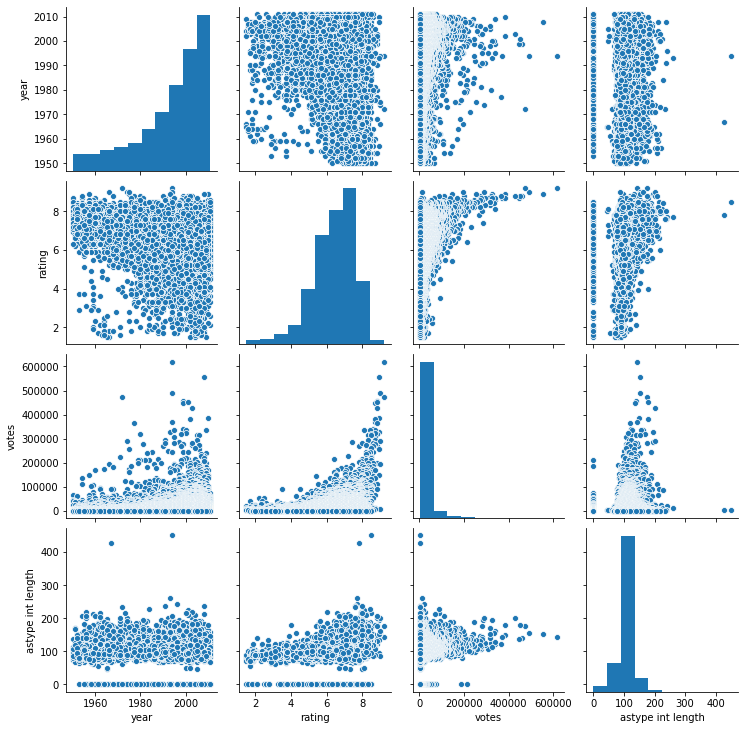

In [70]:
sns.pairplot(clean_data)